Create an ARIMA model for time series forecasting

<ipython-input-23-73abfeee4c0d>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


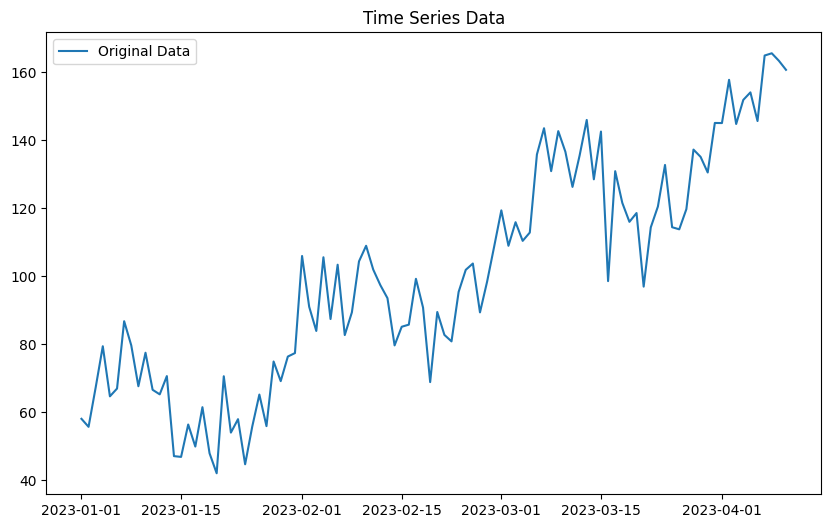

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -348.346
Date:                            Tue, 25 Mar 2025   AIC                            706.691
Time:                                    03:20:56   BIC                            719.021
Sample:                                01-01-2023   HQIC                           711.656
                                     - 04-10-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1340      0.214     -0.628      0.530      -0.552       0.284
ma.L1         -0.4756      0.195   

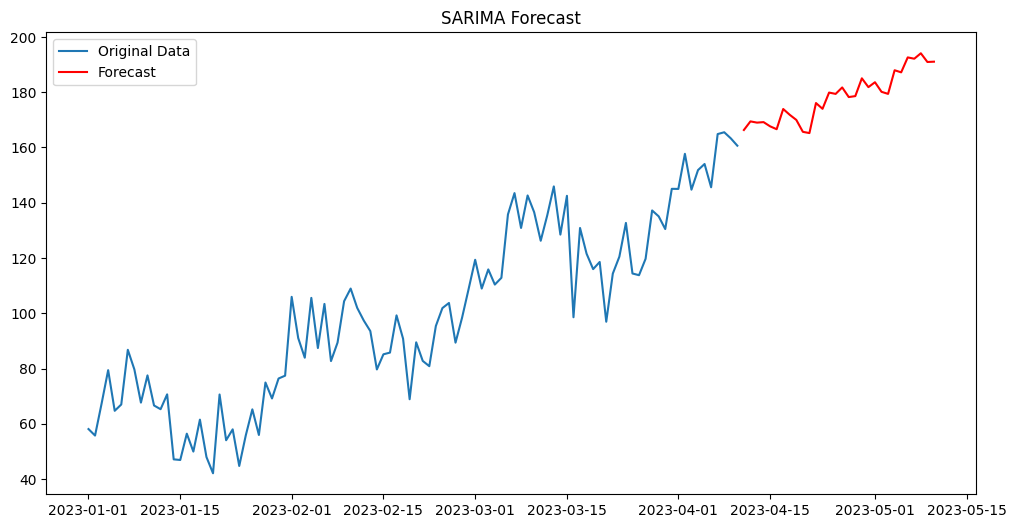

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
data = pd.read_csv('/content/time_series_arima.csv', parse_dates=['Date'], index_col='Date')
data = data.asfreq('D')  # Adjust frequency as needed

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.title('Time Series Data')
plt.legend()
plt.show()

# Fit SARIMA model
seasonal_order = (1, 1, 1, 12)
order = (1, 1, 1)

model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
result = model.fit(disp=False)

print(result.summary())

# Forecast future values
forecast_steps = 30
forecast = result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_values = forecast.predicted_mean

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast_index, forecast_values, color='red', label='Forecast')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()